# Biodiversity in national parks
## Overview
In this project I will be working with two related databases portraying biodiversity across the different species and information about it's observations.

Here are the variables of each dataset.

Species_info:
* __category:__ class of animal;
* __scientific_name:__ the scientific name of each species;
* __common_names:__ the common name of each species;
* __conservation_status:__ each species' current conservation status.

Observations:
* __scientific_name:__ the scientific name of each species;
* __park_name:__ park where species were found;
* __observations:__ the number of times each species was observed in the park.
***
In this project I will be looking into following questions:
1. What is the distribution of conservation statuses for different animals?
2. What is the correlation between conservation status of the animal and it's number of observations?
3. Is there a correlation between species of different categories being assigned with conservations status?
4. What is the distribution of animal species' observations across different parks?
5. What park has the largest number of observations of the animals with each type of conservation status?

## Data investigation
Let's see if the data has any missing values or if it needs tidying.

In [1]:
#Importing needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency

Further investigation shows that both `observations` and `species` datasets have `scientific_name` duplicates inside. It is unclear why the duplicates occured but inspectation of each table provides some useful information. Duplicates in `species` dataset appear to have the same data formatted differently. This is why I will be dropping duplicates in this table.  
Duplicates in `observation` dataset, on the other hand, seem to have different data in `observations` column. It is hard to say why are duplicates there. One potential reason is the data collection error. I will be holding on to this theory and sum the data in duplicated rows.

In [2]:
#Reading databases
species = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

#Dropping duplicates in species dataset
species.drop_duplicates(subset='scientific_name', inplace=True, ignore_index=True)

#Summing observation value in duplicates
observations = observations.groupby(['scientific_name', 'park_name']).agg({'observations': 'sum'}).reset_index()


display(species)
display(observations)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5536,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5537,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5538,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5539,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


,scientific_name,park_name,observations
0,Abies bifolia,Bryce National Park,109
1,Abies bifolia,Great Smoky Mountains National Park,72
2,Abies bifolia,Yellowstone National Park,215
3,Abies bifolia,Yosemite National Park,136
4,Abies concolor,Bryce National Park,83
...,...,...,...
22159,Zygodon viridissimus,Yosemite National Park,159
22160,Zygodon viridissimus var. rupestris,Bryce National Park,102
22161,Zygodon viridissimus var. rupestris,Great Smoky Mountains National Park,102
22162,Zygodon viridissimus var. rupestris,Yellowstone National Park,237


In [3]:
display(species.info(), observations.info())
display(species.conservation_status.unique())
display(species['category'].unique())
display(observations['park_name'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5541 entries, 0 to 5540
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5541 non-null   object
 1   scientific_name      5541 non-null   object
 2   common_names         5541 non-null   object
 3   conservation_status  178 non-null    object
dtypes: object(4)
memory usage: 173.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22164 entries, 0 to 22163
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  22164 non-null  object
 1   park_name        22164 non-null  object
 2   observations     22164 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 519.6+ KB


None

None

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

array(['Bryce National Park', 'Great Smoky Mountains National Park',
       'Yellowstone National Park', 'Yosemite National Park'],
      dtype=object)

***
Data investigation provides us with following information:
* There are 5541 species in the dataset;
* There are 5 types of data in `conservation_status` column showing the level of protection given to species;
* The only column with missing values apeears to be `conservation_status` in `species` database which means that the species is not in danger;
* There are 7 observed species' categories in the dataset;
* There are 4 observed national parks.

## Data Analysis
### Species
Let's dig into the data and find out something new about it.
#### Conservation status inside a category

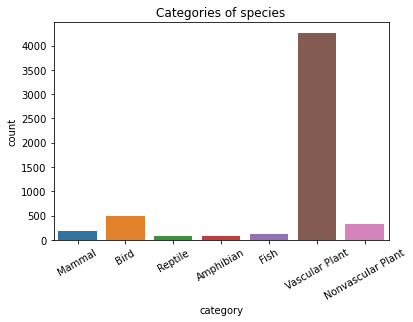

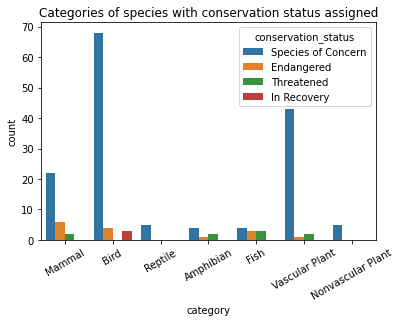

<Figure size 432x288 with 0 Axes>

In [4]:
#First, lets look at the species category distribution and conservation status distribution
species.conservation_status.fillna('No status', inplace=True)
species_conservation = species[~(species.conservation_status == 'No status')]

sns.countplot(x='category', data=species)
plt.xticks(rotation=30)
plt.title('Categories of species')
plt.show()
plt.clf()

sns.countplot(x='category', hue='conservation_status', data=species_conservation)
plt.xticks(rotation=30)
plt.title('Categories of species with conservation status assigned')
plt.show()
plt.clf()

Vascular plants take significant amount of space on the species' category plot which explains it's high bar on conservation status plot.
Birds, on the other hand, skyrocket on the second graph even though they are relatively small on the first graph.

We will have to look into proportion of species with conservation status assigned to the total count of the category.

In [5]:
for i in species['category'].unique():
    proportion = round(len(species_conservation[species_conservation.category == i]) / len(species[species.category == i]), 2)
    print("Proportion of " + i + "s' species with conservation status assigned is " + str(proportion))

Proportion of Mammals' species with conservation status assigned is 0.17
Proportion of Birds' species with conservation status assigned is 0.15
Proportion of Reptiles' species with conservation status assigned is 0.06
Proportion of Amphibians' species with conservation status assigned is 0.09
Proportion of Fishs' species with conservation status assigned is 0.08
Proportion of Vascular Plants' species with conservation status assigned is 0.01
Proportion of Nonvascular Plants' species with conservation status assigned is 0.02


Turns out mammals and birds have the biggest conservation category proportion with 17% and 15% of its' species having conservation category.
Plants have the smallest proportion with 1% and 2% of its species having conservation category assigned to them.  
Let's convert this data into a table and put it on a graph.

In [6]:
#create a new variable showing if conservation status is assigned
species['status_assigned'] = species.conservation_status != 'No status'

category_counts = species.groupby(['category', 'status_assigned'])\
                            .scientific_name.count()\
                            .reset_index()\
                            .pivot(columns='status_assigned',
                                   index='category',
                                   values='scientific_name').reset_index()

category_counts.columns = ['category', 'not_protected', 'protected']
category_counts['percent_protected'] = round(category_counts.protected / (category_counts.not_protected + category_counts.protected) * 100, 2)

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.86
1,Bird,413,75,15.37
2,Fish,115,10,8.00
3,Mammal,146,30,17.05
4,Nonvascular Plant,328,5,1.50
5,Reptile,73,5,6.41
6,Vascular Plant,4216,46,1.08


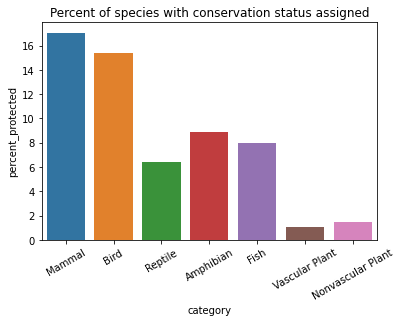

<Figure size 432x288 with 0 Axes>

In [7]:
sns.barplot(x='category', y='percent_protected', data=category_counts, order=species.category.unique())
plt.title('Percent of species with conservation status assigned')
plt.xticks(rotation=30)
plt.show()
plt.clf()

#### Statistical Significance

In this section I will look into the question:  
Is there a correlation between one category's number of species with conservation status assigned to them and other category.  

To do this I will be using chi squared test which will show the possibility of two variables being related.
To use chi test I will need to make a cross table which looks like this:  
  
||Protected|Not protected|
|-|-|-|
|Category1|?|?|
|Categort2|?|?|

In this test I will be comparing most protected species (`Mammals`) with the second most protected species (`Birds`) and the least protected animals species (`Reptiles`).

In [8]:
#Mammals and birds
contingency1 = [[30, 146],
               [75, 413]]
display(chi2_contingency(contingency1))

(0.1617014831654557,
 0.6875948096661336,
 1,
 array([[ 27.8313253, 148.1686747],
        [ 77.1686747, 410.8313253]]))

The first number printed out is chi2, and the second is p-value. Since the contingency table is 2x2 we are looking for a chi2 value of 4 or higher and a p-value of 0.05 and lower.  
The numbers we got are far from the borderline so there is probably little to no relation between mammals and birds conservation status.

In [9]:
#Mammals and reptiles
contingency2 = [[30, 146],
               [5, 73]]
display(chi2_contingency(contingency2))

(4.289183096203645,
 0.03835559022969898,
 1,
 array([[ 24.2519685, 151.7480315],
        [ 10.7480315,  67.2519685]]))

Numbers we've got in the output are close to the ones we are looking for. This could mean that there is correalation between mammals and reptiles conservation statuses. But it still might be wrong so we will need extra data to research these relations.

### Observations
#### Species diversity
Now, let's see how many species have been spot in each park and how many of them have been assigned with conservation category.  
Firstly, I will merge two datasets so we will be able to work with the `category` and `conservation_status` variables.

In [10]:
observations_merged = observations.merge(species, on='scientific_name')

In [11]:
display(observations_merged)

,scientific_name,park_name,observations,category,common_names,conservation_status,status_assigned
0,Abies bifolia,Bryce National Park,109,Vascular Plant,Rocky Mountain Alpine Fir,No status,False
1,Abies bifolia,Great Smoky Mountains National Park,72,Vascular Plant,Rocky Mountain Alpine Fir,No status,False
2,Abies bifolia,Yellowstone National Park,215,Vascular Plant,Rocky Mountain Alpine Fir,No status,False
3,Abies bifolia,Yosemite National Park,136,Vascular Plant,Rocky Mountain Alpine Fir,No status,False
4,Abies concolor,Bryce National Park,83,Vascular Plant,"Balsam Fir, Colorado Fir, Concolor Fir, Silver...",No status,False
...,...,...,...,...,...,...,...
22159,Zygodon viridissimus,Yosemite National Park,159,Nonvascular Plant,Zygodon Moss,No status,False
22160,Zygodon viridissimus var. rupestris,Bryce National Park,102,Nonvascular Plant,Zygodon Moss,No status,False
22161,Zygodon viridissimus var. rupestris,Great Smoky Mountains National Park,102,Nonvascular Plant,Zygodon Moss,No status,False
22162,Zygodon viridissimus var. rupestris,Yellowstone National Park,237,Nonvascular Plant,Zygodon Moss,No status,False


Now, let's look how many unique animals have been spot in each park.

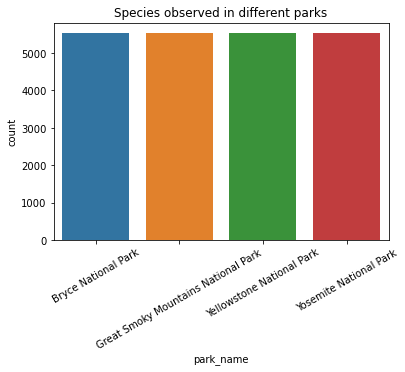

,scientific_name,observations,category,common_names,conservation_status,status_assigned
park_name,,,,,,
Bryce National Park,5541,5541,5541,5541,5541,5541
Great Smoky Mountains National Park,5541,5541,5541,5541,5541,5541
Yellowstone National Park,5541,5541,5541,5541,5541,5541
Yosemite National Park,5541,5541,5541,5541,5541,5541


<Figure size 432x288 with 0 Axes>

In [12]:
sns.countplot(x='park_name', data=observations_merged)
plt.title('Species observed in different parks')
plt.xticks(rotation=30)
plt.show()
plt.clf()

display(observations_merged.groupby('park_name').count())

It appears that every given species has been observed in each park at least once.

#### Protected species diversity
Let's see how ofthen can you observe rare species in each park.

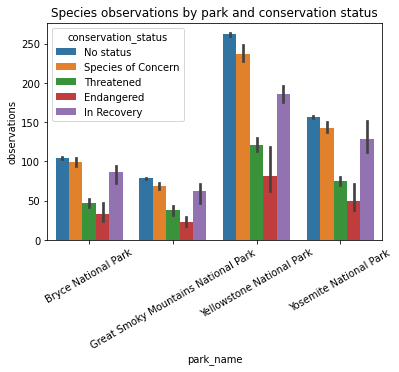

<Figure size 432x288 with 0 Axes>

In [13]:
sns.barplot(x='park_name', y='observations', hue='conservation_status', data=observations_merged)
plt.title('Species observations by park and conservation status')
plt.xticks(rotation=30)
plt.show()
plt.clf()

While proportion of observations for each conservation status stays the same in each park (species with no conservation status are more likely to be observed than endangered species), numbers of observations are different. 

#### Species diversity by category
Let's see what category of species is the most observed in each park.

In [14]:
#create a new table for plotting the graph
category_observations = observations_merged.groupby(['park_name', 'category']).agg({'observations': 'sum'}).reset_index()

park_observations_overall = category_observations.groupby('park_name').agg({'observations': 'sum'}).reset_index()

category_observations = category_observations.merge(park_observations_overall, on='park_name', suffixes=['', '_sum'])

category_observations['percent'] = round(category_observations.observations / category_observations.observations_sum, 2)

category_observations = category_observations.sort_values(by=['park_name', 'percent'], ascending=[True, False])

display(category_observations)

,park_name,category,observations,observations_sum,percent
6,Bryce National Park,Vascular Plant,443083,576025,0.77
1,Bryce National Park,Bird,51647,576025,0.09
4,Bryce National Park,Nonvascular Plant,32992,576025,0.06
3,Bryce National Park,Mammal,20550,576025,0.04
2,Bryce National Park,Fish,12423,576025,0.02
0,Bryce National Park,Amphibian,7380,576025,0.01
5,Bryce National Park,Reptile,7950,576025,0.01
13,Great Smoky Mountains National Park,Vascular Plant,333619,431820,0.77
8,Great Smoky Mountains National Park,Bird,37728,431820,0.09
11,Great Smoky Mountains National Park,Nonvascular Plant,24857,431820,0.06


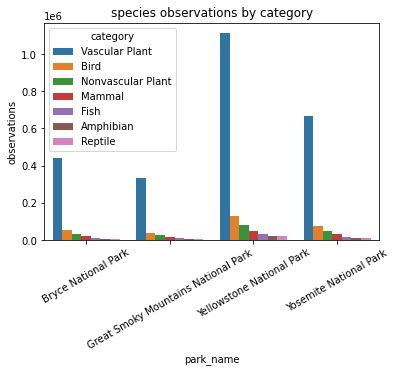

<Figure size 432x288 with 0 Axes>

In [15]:
sns.barplot(x='park_name', y='observations', hue='category', data=category_observations)
plt.title('species observations by category')
plt.xticks(rotation=30)
plt.show()
plt.clf()

Once again we see that species diversity is the same across all four parks with only numbers of observations to be different.

## Conclusions
1. Mammals are the most endangered category of species, followed by birds. Plants have the smallest percent of endangered species even though they have the most endangered species in quantity.
2. Not endangered species are the most observed in national parks, followed by species of concern, species in recovery, threatened and endangered.
3. There seem to be a correlation between mammals and reptiles being assigned with a conservation status but the output of a chi2 test was borderline positive so it is better to take this assumption with a grain of salt and look into it with further research.
4. Species share the same distribution across all the parks with number of observations being the only difference.
5. Yellowstone National Park has the largest number of observations of both species assigned with conservation status and not endangered species.

## Further research
Continuing this research, it will be a good idea to increase the size of both observed parks and species.  
It will help in confirming or rejecting stated conclusions and looking into new theories.  